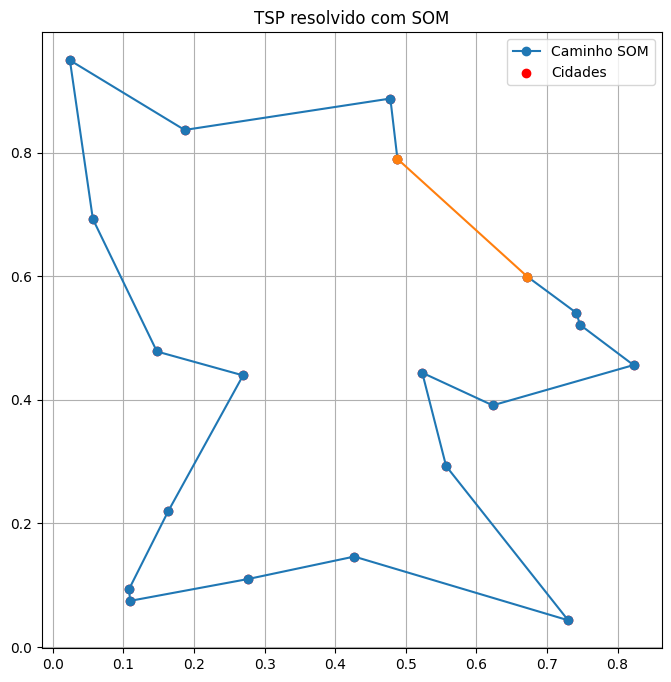

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
num_cidades = 20
num_neuronios = 8 * num_cidades  # mais neurônios que cidades
num_epocas = 1000
alpha_inicial = 0.8
raio_inicial = num_neuronios // 2
decaimento_constante = num_epocas / np.log(raio_inicial)

# Gerar cidades aleatórias no plano [0,1]x[0,1]
cidades = np.random.rand(num_cidades, 2)

# Inicializar neurônios em um círculo
theta = np.linspace(0, 2*np.pi, num_neuronios, endpoint=False)
neuronios = np.column_stack((np.cos(theta), np.sin(theta))) * 0.5 + 0.5  # centralizado no [0,1]x[0,1]

# Função de distância euclidiana
def distancia(a, b):
    return np.linalg.norm(a - b, axis=1)

# Treinamento SOM
for epoca in range(num_epocas):
    cidade_idx = np.random.randint(num_cidades)
    cidade = cidades[cidade_idx]

    # Encontrar neurônio vencedor
    distancias = distancia(neuronios, cidade)
    vencedor_idx = np.argmin(distancias)

    # Decaimento dos parâmetros
    alpha = alpha_inicial * np.exp(-epoca / num_epocas)
    raio = raio_inicial * np.exp(-epoca / decaimento_constante)

    # Atualizar neurônios
    for i in range(num_neuronios):
        # distância circular entre os neurônios (SOM é um anel)
        delta = min(abs(i - vencedor_idx), num_neuronios - abs(i - vencedor_idx))
        if delta < raio:
            influencia = np.exp(-delta**2 / (2 * (raio**2)))
            neuronios[i] += alpha * influencia * (cidade - neuronios[i])

# Obter ordem final das cidades
ordem = []
for cidade in cidades:
    distancias = distancia(neuronios, cidade)
    idx = np.argmin(distancias)
    ordem.append((idx, cidade))
ordem.sort()
caminho = np.array([cidade for _, cidade in ordem])

# Plotar resultado
plt.figure(figsize=(8, 8))
plt.plot(caminho[:, 0], caminho[:, 1], 'o-', label='Caminho SOM')
plt.plot([caminho[-1, 0], caminho[0, 0]], [caminho[-1, 1], caminho[0, 1]], 'o-')  # fechar o ciclo
plt.scatter(cidades[:, 0], cidades[:, 1], c='red', label='Cidades')
plt.title('TSP resolvido com SOM')
plt.legend()
plt.grid(True)
plt.show()
